**Case Study #1 Group 06**

Sreeja Thazhathethil - 101270113

Yagna Priyadarshni Himachalapathy - 101264712

Bensy Chitteth -  101263628

Kalpesh Bhurabhai Odedra - 101331600

Suraj Rampure - 101344591

Mirza Razin Alam - 101329992

**21.3 TAYKO SOFTWARE CATALOGER**

Develop a logistic regression model for classifying a customer as a purchaser or nonpurchaser. Partition the data randomly into training set 60% validation set 40%. Run
logistic regression with L2 penalty, using method LogisticRegressionCV. Please submit
Python code. (5 Marks)

In [1]:
!pip install mord

You should consider upgrading via the 'c:\users\kalpe\anaconda3\python.exe -m pip install --upgrade pip' command.



  Created wheel for mord: filename=mord-0.6-py3-none-any.whl size=6012 sha256=b0e4c3c026a8651ecd5071d2b65740480cab3d544fb229b2dcd28517b1070c79
  Stored in directory: c:\users\kalpe\appdata\local\pip\cache\wheels\1d\94\48\b3d11f5f91d26bec0c95c6eb9c27c6e427d0b77fb2406d0e0a
Successfully built mord


In [1]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from mord import LogisticIT
import matplotlib.pylab as plt
import seaborn as sns
from dmba import classificationSummary, gainsChart, liftChart
from dmba.metric import AIC_score

# Exploratory Analysis

In [2]:
tayko_df= pd.read_csv('Tayko(1).csv')

In [3]:
#Displaying the shape
tayko_df.shape 

(2000, 25)

In [4]:
tayko_df.head()

,sequence_number,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,...,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web order,Gender=male,Address_is_res,Purchase,Spending
0,1,1,0,0,1,0,0,0,0,0,...,0,0,2,3662,3662,1,0,1,1,128
1,2,1,0,0,0,0,1,0,0,0,...,0,0,0,2900,2900,1,1,0,0,0
2,3,1,0,0,0,0,0,0,0,0,...,0,0,2,3883,3914,0,0,0,1,127
3,4,1,0,1,0,0,0,0,0,0,...,0,0,1,829,829,0,1,0,0,0
4,5,1,0,1,0,0,0,0,0,0,...,0,0,1,869,869,0,0,0,0,0


In [5]:
pd.set_option('display.max_columns', None)

In [6]:
#Displaying first few records
tayko_df['Spending'].head(40)

0      128
1        0
2      127
3        0
4        0
5        0
6        0
7        0
8      489
9      174
10       0
11       0
12       0
13    1416
14     192
15       0
16       0
17       0
18     130
19       0
20     386
21     161
22       0
23     174
24     131
25     189
26       0
27       0
28      90
29     354
30       0
31     352
32       0
33       0
34       0
35       0
36     185
37       0
38       0
39       0
Name: Spending, dtype: int64

In [7]:
#datatypes of the variables
tayko_df.dtypes

sequence_number         int64
US                      int64
source_a                int64
source_c                int64
source_b                int64
source_d                int64
source_e                int64
source_m                int64
source_o                int64
source_h                int64
source_r                int64
source_s                int64
source_t                int64
source_u                int64
source_p                int64
source_x                int64
source_w                int64
Freq                    int64
last_update_days_ago    int64
1st_update_days_ago     int64
Web order               int64
Gender=male             int64
Address_is_res          int64
Purchase                int64
Spending                int64
dtype: object

In [8]:
#ALl columns have an underscore hence renaming just the web order column with an underscore
tayko_df = tayko_df.rename(columns={'Web order': 'Web_Order'})

In [9]:
list(tayko_df.columns)

['sequence_number',
 'US',
 'source_a',
 'source_c',
 'source_b',
 'source_d',
 'source_e',
 'source_m',
 'source_o',
 'source_h',
 'source_r',
 'source_s',
 'source_t',
 'source_u',
 'source_p',
 'source_x',
 'source_w',
 'Freq',
 'last_update_days_ago',
 '1st_update_days_ago',
 'Web_Order',
 'Gender=male',
 'Address_is_res',
 'Purchase',
 'Spending']

In [10]:
data_stats= tayko_df.iloc[0:,17:25]
data_stats

,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res,Purchase,Spending
0,2,3662,3662,1,0,1,1,128
1,0,2900,2900,1,1,0,0,0
2,2,3883,3914,0,0,0,1,127
3,1,829,829,0,1,0,0,0
4,1,869,869,0,0,0,0,0
...,...,...,...,...,...,...,...,...
1995,1,1701,1701,1,0,0,1,30
1996,1,2633,2633,1,1,0,1,10
1997,0,3394,3394,0,0,0,0,0
1998,1,253,253,0,1,1,0,0


In [11]:
data_stats.drop(columns =["Web_Order",'Gender=male','Address_is_res','Purchase'],inplace=True)

In [12]:
#Descriptive statistics
pd.DataFrame({'mean': data_stats.mean(),
'sd': data_stats.std(),
'min': data_stats.min(),
'max': data_stats.max(),
'median': data_stats.median(),
'miss.val': data_stats.isnull().sum(),
})

,mean,sd,min,max,median,miss.val
Freq,1.4170,1.405738,0,15,1.0,0
last_update_days_ago,2155.1010,1141.302846,1,4188,2280.0,0
1st_update_days_ago,2435.6015,1077.872233,1,4188,2721.0,0
Spending,102.6250,186.782610,0,1500,2.0,0


In [13]:
tayko_df.dropna(inplace = True)

In [14]:
#Checking for missing values
tayko_df.isnull().sum()

sequence_number         0
US                      0
source_a                0
source_c                0
source_b                0
source_d                0
source_e                0
source_m                0
source_o                0
source_h                0
source_r                0
source_s                0
source_t                0
source_u                0
source_p                0
source_x                0
source_w                0
Freq                    0
last_update_days_ago    0
1st_update_days_ago     0
Web_Order               0
Gender=male             0
Address_is_res          0
Purchase                0
Spending                0
dtype: int64

In [15]:
#Remove certain variables from the onset (i.e., spending and sequence number)
#spending amount is not a predictor of weather a person pruchased or not.

tayko_df.drop(columns =["sequence_number","Spending"], inplace = True)
tayko_df.head(5)

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res,Purchase
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2900,2900,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,829,829,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,869,869,0,0,0,0


In [16]:
#Count number of unique values in each variable
num = tayko_df.nunique(axis=0)

In [17]:
print("Distinct No. of values :\n", 
      num)

Distinct No. of values :
 US                        2
source_a                  2
source_c                  2
source_b                  2
source_d                  2
source_e                  2
source_m                  2
source_o                  2
source_h                  2
source_r                  2
source_s                  2
source_t                  2
source_u                  2
source_p                  2
source_x                  2
source_w                  2
Freq                     15
last_update_days_ago    940
1st_update_days_ago     923
Web_Order                 2
Gender=male               2
Address_is_res            2
Purchase                  2
dtype: int64


<AxesSubplot:xlabel='source_w', ylabel='count'>

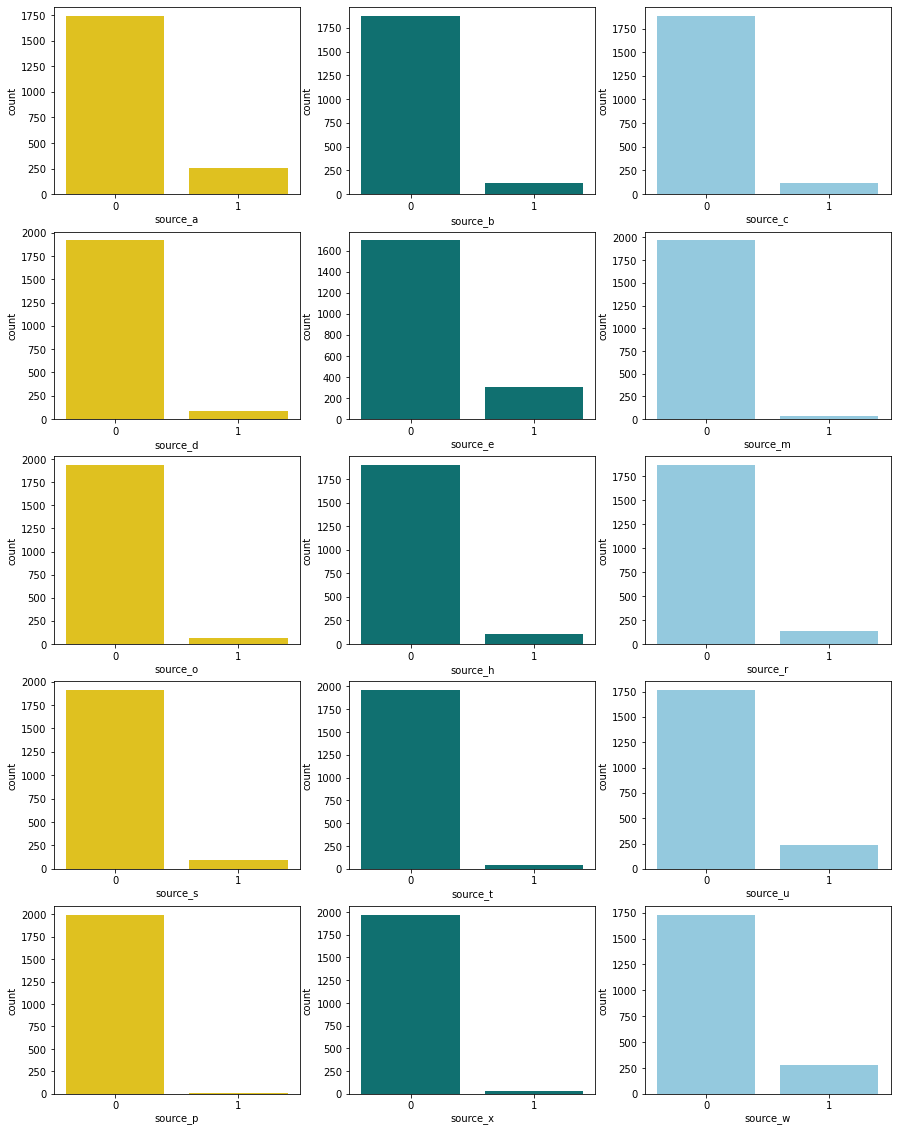

In [18]:
# looking at counts of 0 & 1 in each of the source varibales.
import warnings
warnings.filterwarnings("ignore")
df = tayko_df
 
f, axes = plt.subplots(5, 3, figsize=(15, 20),)
sns.countplot( df["source_a"] , color="gold",  ax=axes[0, 0])
sns.countplot( df["source_b"] , color="teal", ax=axes[0, 1])
sns.countplot( df["source_c"] , color="skyblue", ax=axes[0, 2])
sns.countplot( df["source_d"] , color="gold", ax=axes[1, 0])
sns.countplot( df["source_e"] , color="teal", ax=axes[1, 1])
sns.countplot( df["source_m"] , color="skyblue", ax=axes[1, 2])
sns.countplot( df["source_o"] , color="gold", ax=axes[2, 0])
sns.countplot( df["source_h"] , color="teal", ax=axes[2, 1])
sns.countplot( df["source_r"] , color="skyblue", ax=axes[2, 2])
sns.countplot( df["source_s"] , color="gold", ax=axes[3, 0])
sns.countplot( df["source_t"] , color="teal", ax=axes[3, 1])
sns.countplot( df["source_u"] , color="skyblue", ax=axes[3, 2])
sns.countplot( df["source_p"] , color="gold",ax=axes[4, 0])
sns.countplot( df["source_x"] , color="teal", ax=axes[4, 1])
sns.countplot( df["source_w"] , color="skyblue", ax=axes[4, 2])


<AxesSubplot:xlabel='Address_is_res', ylabel='count'>

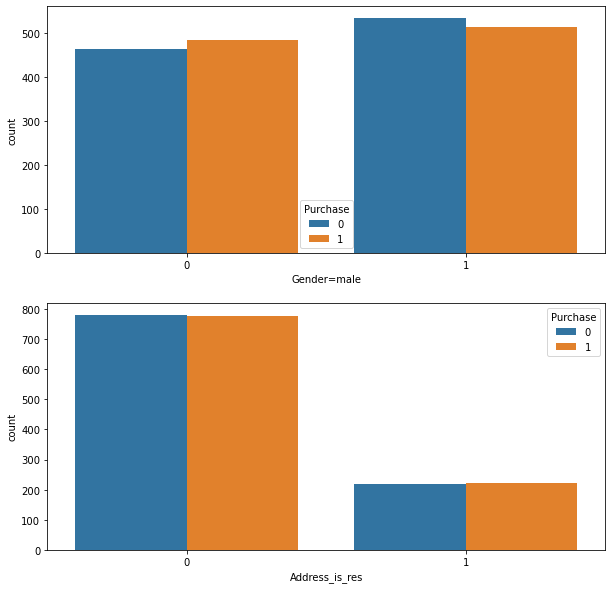

In [19]:
warnings.filterwarnings("ignore")
f,ax=plt.subplots(2,figsize=(10,10))

#Scatterplot showing the spending amount by the Gender=male
sns.countplot(x="Gender=male", hue="Purchase", data=df,ax=ax[0])

#Scatterplot showing the spending amount by the Address_is_res
sns.countplot(x="Address_is_res", hue="Purchase", data=df,ax=ax[1])

## The dataset has slightly more number of males and among males the pruchase is lower than non-purchases, while among females purchases are higher than non-purchases.

## There are also more non-residents who purchased the product. The number of purchases almost equal to pruchases among both residents and non-residents.

In [20]:
df.Freq.value_counts()

1     921
2     419
0     398
3     148
4      49
5      29
6      12
7       8
8       4
9       4
10      2
11      2
12      2
13      1
15      1
Name: Freq, dtype: int64

<AxesSubplot:xlabel='Freq', ylabel='count'>

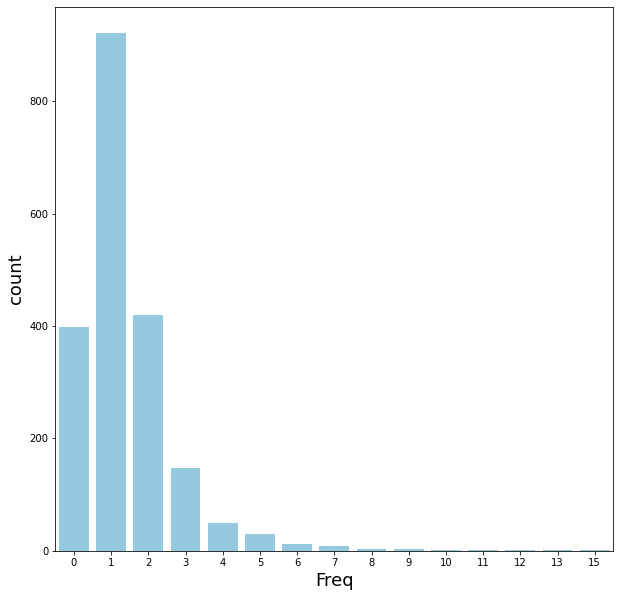

In [21]:
# cheking for frequencies in Freq variable since it has more that 2 categories.
f, axes = plt.subplots(1,figsize=(10, 10))
plt.xlabel('Frequency of Pruchase', fontsize=18)
plt.ylabel('Counts', fontsize=18)
sns.countplot( df['Freq'] , color="skyblue")


#### Number of people who purchased 1 is the highest.
#### About 400 frequency of 0  and 2 purchases.
#### Very low number of people bought more than 4 times.

<AxesSubplot:xlabel='1st_update_days_ago'>

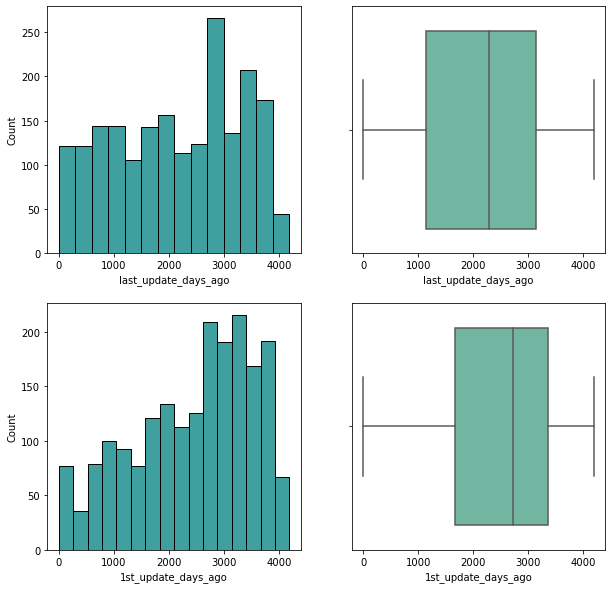

In [22]:
f, axes = plt.subplots(2,2, figsize=(10, 10))

sns.histplot(df['last_update_days_ago'] ,color="teal",ax=axes[0,0])

sns.boxplot(df['last_update_days_ago'] ,palette="Set2",ax=axes[0,1], orient="v")
sns.histplot(df['1st_update_days_ago'] ,color="teal",ax=axes[1,0])

sns.boxplot(df['1st_update_days_ago'] ,palette="Set2",ax=axes[1,1], orient="v")

<AxesSubplot:xlabel='Freq', ylabel='Purchase'>

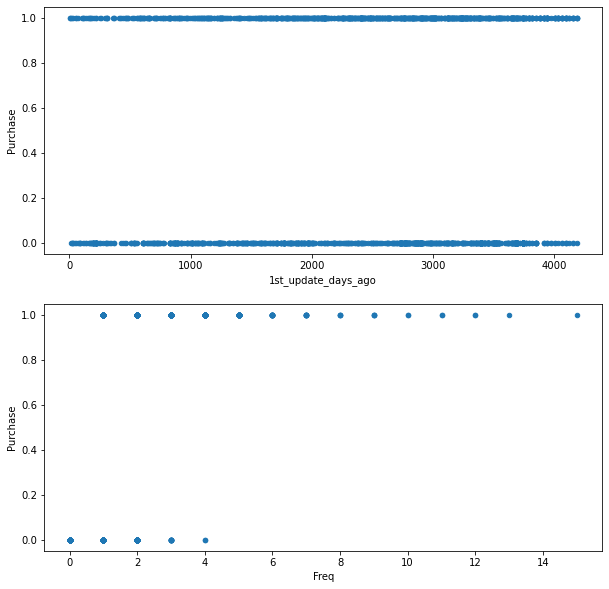

In [23]:
f,ax=plt.subplots(2,figsize=(10,10))
#Scatterplot showing the spending amount by the Address_is_res
df.plot.scatter ('1st_update_days_ago', 'Purchase',ax=ax[0])

#Scatterplot showing the spending amount by the Address_is_res
df.plot.scatter ('Freq', 'Purchase',ax=ax[1])

### There are no outliers and thogh the values are  a little skewed, we should be fine proceeding with the model since total number of reccords are high enough.

### People who purhcased have higher frequecny of update of reccord than non-purchasers, which is obvious since act of purchase increases the frequency.

# Correlation and Principal component Analysis

In [24]:
# Checking variables again
tayko_df.head(9)

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res,Purchase
0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,2,3662,3662,1,0,1,1
1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,2900,2900,1,1,0,0
2,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,3883,3914,0,0,0,1
3,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,829,829,0,1,0,0
4,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,869,869,0,0,0,0
5,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1995,2002,0,0,1,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,2,1498,1529,0,0,1,0
7,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,3397,3397,0,1,0,0
8,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,525,2914,1,1,0,1


### We conduct correlation analysis to find variable pairs with high correlation ( generally >0.7 or <-0.7) to check for collinearity. And then remove some of the variables to remove collinearity.

In [25]:
# Creating a correlation table
corrMatrix =tayko_df.corr().round(2)
corrMatrix

,US,source_a,source_c,source_b,source_d,source_e,source_m,source_o,source_h,source_r,source_s,source_t,source_u,source_p,source_x,source_w,Freq,last_update_days_ago,1st_update_days_ago,Web_Order,Gender=male,Address_is_res,Purchase
US,1.00,0.10,0.08,-0.03,0.10,-0.09,0.05,0.01,0.01,0.04,0.10,0.00,-0.04,-0.02,0.06,-0.21,0.03,0.04,0.08,0.00,0.03,0.02,0.02
source_a,0.10,1.00,-0.09,-0.10,-0.08,-0.16,-0.05,-0.07,-0.09,-0.10,-0.08,-0.06,-0.14,-0.03,-0.05,-0.15,0.18,0.11,0.23,0.06,0.04,-0.02,0.21
source_c,0.08,-0.09,1.00,-0.06,-0.05,-0.10,-0.03,-0.05,-0.06,-0.07,-0.05,-0.04,-0.09,-0.02,-0.03,-0.10,0.01,-0.17,-0.17,0.02,0.00,-0.05,-0.05
source_b,-0.03,-0.10,-0.06,1.00,-0.05,-0.11,-0.03,-0.05,-0.06,-0.07,-0.06,-0.04,-0.09,-0.02,-0.03,-0.10,-0.07,0.25,0.25,-0.01,0.00,-0.08,-0.10
source_d,0.10,-0.08,-0.05,-0.05,1.00,-0.09,-0.03,-0.04,-0.05,-0.06,-0.05,-0.03,-0.08,-0.02,-0.03,-0.08,0.05,0.14,0.15,-0.01,0.00,-0.05,0.03
source_e,-0.09,-0.16,-0.10,-0.11,-0.09,1.00,-0.05,-0.08,-0.10,-0.11,-0.09,-0.06,-0.15,-0.03,-0.06,-0.17,-0.05,0.07,0.05,-0.04,-0.02,-0.04,-0.05
source_m,0.05,-0.05,-0.03,-0.03,-0.03,-0.05,1.00,-0.02,-0.03,-0.04,-0.03,-0.02,-0.05,-0.01,-0.02,-0.05,0.00,-0.02,-0.03,-0.02,0.02,-0.00,0.02
source_o,0.01,-0.07,-0.05,-0.05,-0.04,-0.08,-0.02,1.00,-0.04,-0.05,-0.04,-0.03,-0.07,-0.01,-0.03,-0.07,-0.12,0.19,0.23,-0.02,0.00,-0.05,-0.11
source_h,0.01,-0.09,-0.06,-0.06,-0.05,-0.10,-0.03,-0.04,1.00,-0.06,-0.05,-0.03,-0.09,-0.02,-0.03,-0.09,0.11,-0.13,-0.17,-0.05,-0.04,0.40,-0.18
source_r,0.04,-0.10,-0.07,-0.07,-0.06,-0.11,-0.04,-0.05,-0.06,1.00,-0.06,-0.04,-0.10,-0.02,-0.04,-0.11,0.01,-0.04,-0.05,-0.01,-0.02,0.05,0.02


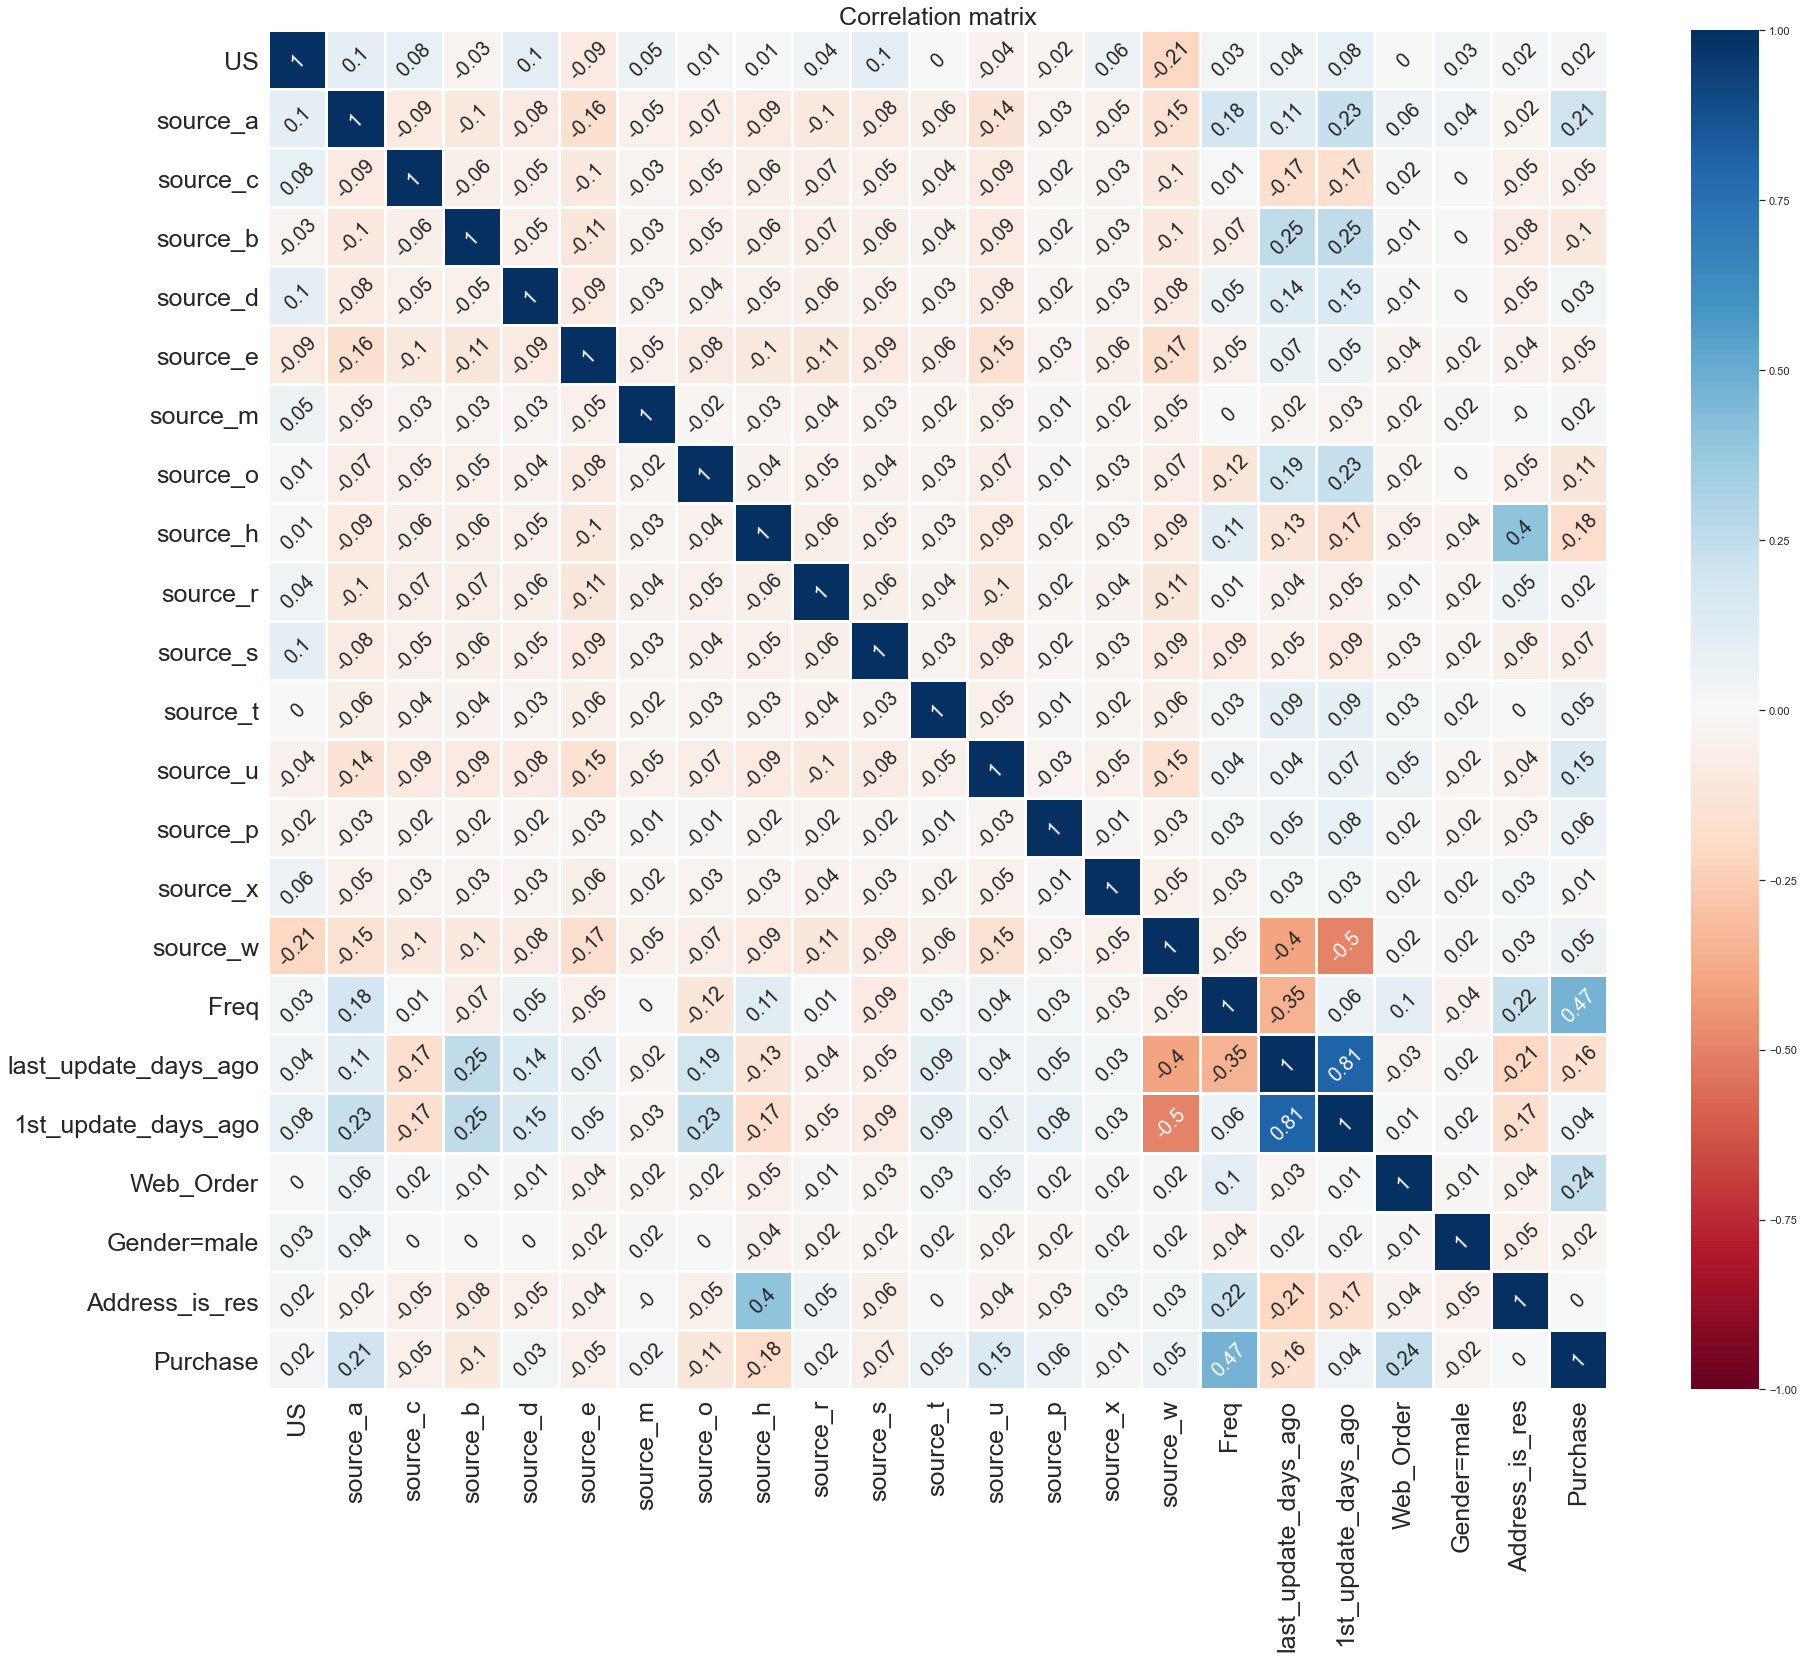

In [26]:
#Correlation table & Heatmap
sns.set(font_scale=0.1)
sns.set(rc={'figure.figsize':(30,25)})
r=sns.heatmap(corrMatrix, annot=True, linewidth = 2, cmap='RdBu',square=False, vmin = -1, vmax = 1,annot_kws={'size': 20,'rotation': 45})
plt.title('Correlation matrix', fontsize=25)
r.set_xticklabels(r.get_xmajorticklabels(), fontsize = 25)
r.set_yticklabels(r.get_ymajorticklabels(), fontsize = 25)

plt.show()

In [27]:
figure = r.get_figure() 
figure.savefig('Heatmap.png', dpi=400)

### The above correaltion table shows that there is:

- high correlation(0.81) between "last_update_days_ago" and "1st_update_days_ago".
- No other correlation is more than 0.7 or less than -0.7. Correlation between spending and frequency is ignored  sincespending variable is dropped in the analysis.

If we were to reduce variables due to colinearity, we would remove either "last_update_days_ago" or"1st_update_days_ago".



## PCA Analysis

In [23]:
# PCA Analysis

from sklearn import preprocessing
from sklearn.decomposition import PCA
pcs = PCA()
pcs.fit(preprocessing.scale(tayko_df))
pcsSummary_df = pd.DataFrame({'Standard deviation': np.sqrt(pcs.explained_variance_),
                           'Proportion of variance': pcs.explained_variance_ratio_,
                           'Cumulative proportion': np.cumsum(pcs.explained_variance_ratio_)})
pcsSummary_df = pcsSummary_df.transpose()
pcsSummary_df.columns = ['PC{}'.format(i) for i in range(1, len(pcsSummary_df.columns) + 1)]
pcsSummary_df.round(4)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23
Standard deviation,1.6050,1.3696,1.2255,1.1412,1.0754,1.0723,1.0389,1.0353,1.0297,1.0284,1.0203,1.0190,1.0118,1.0077,0.983,0.9538,0.9165,0.8682,0.7680,0.6744,0.6429,0.2953,0.2157
Proportion of variance,0.1119,0.0815,0.0653,0.0566,0.0503,0.0500,0.0469,0.0466,0.0461,0.0460,0.0452,0.0451,0.0445,0.0441,0.042,0.0395,0.0365,0.0328,0.0256,0.0198,0.0180,0.0038,0.0020
Cumulative proportion,0.1119,0.1935,0.2587,0.3153,0.3656,0.4155,0.4624,0.5090,0.5551,0.6011,0.6463,0.6914,0.7359,0.7800,0.822,0.8616,0.8981,0.9308,0.9565,0.9762,0.9942,0.9980,1.0000


## PC1 explains 11.19% of variance.
## In total PC1 to PC18 cumulatively explains 93% of variance. So 18 principle components can be selected.

In [24]:
# component summary of how much variation of each of the variable explains in each of the principle components.
pcsComponents_df = pd.DataFrame(pcs.components_.transpose(), columns=pcsSummary_df.columns, 
                                index=tayko_df.columns)
pcsComponents_df.iloc[:,:15]

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
US,-0.077235,0.123109,0.226120,0.570840,0.048756,0.066553,-0.004781,-0.042129,0.057222,0.009027,0.046767,-0.009785,0.033181,0.002967,-0.013993
source_a,-0.112294,0.368004,0.035046,0.127336,0.108417,-0.486356,-0.154292,-0.205002,-0.329380,0.023722,-0.131246,-0.063762,0.053915,-0.075520,0.022221
source_c,0.107733,-0.049625,-0.037860,0.396946,0.100492,0.144870,-0.299192,0.638610,-0.086967,0.187604,-0.194095,0.043553,-0.046688,-0.020345,0.023122
source_b,-0.210687,-0.095976,0.000081,-0.136042,-0.280156,-0.172459,0.009730,0.433888,-0.271081,-0.381011,0.259617,-0.196733,0.054634,0.010806,-0.109291
source_d,-0.111727,0.075146,0.045483,0.147527,-0.010580,0.016242,0.111918,0.051900,0.710953,-0.439595,-0.291541,-0.044256,0.116859,-0.128998,-0.007682
source_e,-0.066131,-0.115653,-0.045882,-0.313187,0.794098,0.131774,-0.046600,-0.015737,0.050014,0.054590,0.075620,-0.014724,0.045615,-0.023244,-0.014533
source_m,0.012919,0.005530,0.011338,0.134796,0.014262,-0.008972,-0.010298,-0.101467,0.183367,0.087537,0.212104,-0.488280,-0.391898,0.582771,-0.326834
source_o,-0.179225,-0.130833,0.033018,-0.016280,-0.204735,-0.116530,-0.041341,-0.167897,0.058955,0.436609,-0.472031,0.255542,-0.080436,0.123688,-0.245541
source_h,0.168218,-0.067059,0.611396,-0.167610,-0.115886,-0.021115,-0.156455,0.013983,0.004845,-0.040746,-0.011492,0.044267,-0.022221,0.016314,0.061681
source_r,0.038541,0.016300,0.072140,0.104544,-0.024832,0.119496,0.868738,0.077795,-0.184278,0.208466,-0.066289,-0.130211,0.009770,-0.088821,0.094596


In [67]:
# Divide the dataset into predictors and outcome variable,
# y= outcome, 
# x= predictors
y= tayko_df["Purchase"]
x= tayko_df.drop(columns=["Purchase"])

In [28]:
# split the data set into 60% = train dataset and 40% = Validation dataset
train_x, valid_x, train_y, valid_y = train_test_split(x, y, test_size=0.4, random_state=1)

In [29]:
# Since the outcome variable is categorical, we need to use Logistic variable.

logit_reg = LogisticRegression(penalty="l2", C=1e42,
solver='liblinear')
logit_reg.fit(train_x, train_y)

LogisticRegression(C=1e+42, solver='liblinear')

In [30]:
# listing coefficients for analysis

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0]},
index=x.columns))

intercept  -3.352425301409916
                         coeff
US                    0.244289
source_a              1.647094
source_c             -0.561251
source_b             -0.311614
source_d              0.167598
source_e              0.379960
source_m              0.981323
source_o              0.697839
source_h             -3.537767
source_r              0.965342
source_s             -0.000980
source_t              0.863860
source_u              1.691005
source_p              1.998950
source_x              1.105712
source_w              0.767149
Freq                  2.180981
last_update_days_ago  0.000166
1st_update_days_ago  -0.000274
Web_Order             0.965675
Gender=male          -0.234322
Address_is_res       -0.529822


### source_c, source_b, source_h, source_s, 1st_update_days_ago, Gender and Addres_is_res are negative. They explain inverse relationship to pruchase prediction 

### source_h especially has high impact due to coeff absolute value more than 3.

### In positive coefficients, Freq has the highest imact followed by source_p and source_u on the purchase prediction.

### To see exactly what the impact would be we need to analyze odds for each of the coefficients.

In [31]:
# print odds with the coeeficients to analyze the exact impact.

print('intercept ', logit_reg.intercept_[0])
print(pd.DataFrame({'coeff': logit_reg.coef_[0], 'Odds': np.exp(logit_reg.coef_[0])}, index=x.columns))

intercept  -3.352425301409916
                         coeff      Odds
US                    0.244289  1.276713
source_a              1.647094  5.191871
source_c             -0.561251  0.570495
source_b             -0.311614  0.732264
source_d              0.167598  1.182461
source_e              0.379960  1.462226
source_m              0.981323  2.667983
source_o              0.697839  2.009406
source_h             -3.537767  0.029078
source_r              0.965342  2.625685
source_s             -0.000980  0.999020
source_t              0.863860  2.372301
source_u              1.691005  5.424931
source_p              1.998950  7.381299
source_x              1.105712  3.021375
source_w              0.767149  2.153618
Freq                  2.180981  8.854985
last_update_days_ago  0.000166  1.000166
1st_update_days_ago  -0.000274  0.999726
Web_Order             0.965675  2.626561
Gender=male          -0.234322  0.791107
Address_is_res       -0.529822  0.588710


### Odds show the direct impact of one unit increase in the value times their respective co-efficients.

#### The odds of purchase are increased by about 8 times when one unit of Freq is increased.
#### The odds of purchase are increased by about 7 times when one unit of source_p is increased.
#### The odds of purchase are increased by about 5 times when one unit of source_U is increased.

### Intresting thing to note here is that being a male negatively predicts purchase. This can mean females have more odds of purchasing the product.

### Also, if the address location is residential it predicts negatively and has lower than 1 odds of 

In [32]:
logit_reg_pred = logit_reg.predict(valid_x)
logit_reg_proba = logit_reg.predict_proba(valid_x)
logit_result = pd.DataFrame({'actual': valid_y, 
                             'p(0)': [p[0] for p in logit_reg_proba],
                             'p(1)': [p[1] for p in logit_reg_proba],
                             'predicted': logit_reg_pred })
logit_result

,actual,p(0),p(1),predicted
674,0,9.609708e-01,0.039029,0
1699,1,5.059006e-02,0.949410,1
1282,0,4.784349e-01,0.521565,1
1315,1,1.294670e-08,1.000000,1
1210,0,9.091932e-01,0.090807,0
...,...,...,...,...
1816,0,9.105501e-01,0.089450,0
390,1,5.364415e-01,0.463558,0
1992,1,2.494265e-01,0.750573,1
78,1,3.325376e-01,0.667462,1


In [33]:
classificationSummary(train_y, logit_reg.predict(train_x

Confusion Matrix (Accuracy 0.8108)

       Prediction
Actual   0   1
     0 512 107
     1 120 461


### Accuracy of 81.08% shows a good fit for the model on the training dataset.

In [34]:
classificationSummary(valid_y, logit_reg.predict(valid_x))

Confusion Matrix (Accuracy 0.8187)

       Prediction
Actual   0   1
     0 321  60
     1  85 334


### Applying model on validation dataset gives 81.87% accuracy, which is quite high. Therefore our model has a good prediction capability.

### However, it should be noted that we did not reduce our variables and therefore we didnt remove collinearity amoung our variables. We know atleast one set of variables has high correaltion from our correlation analysis. Therefore, this model is not actualy feasible in a practical sense.

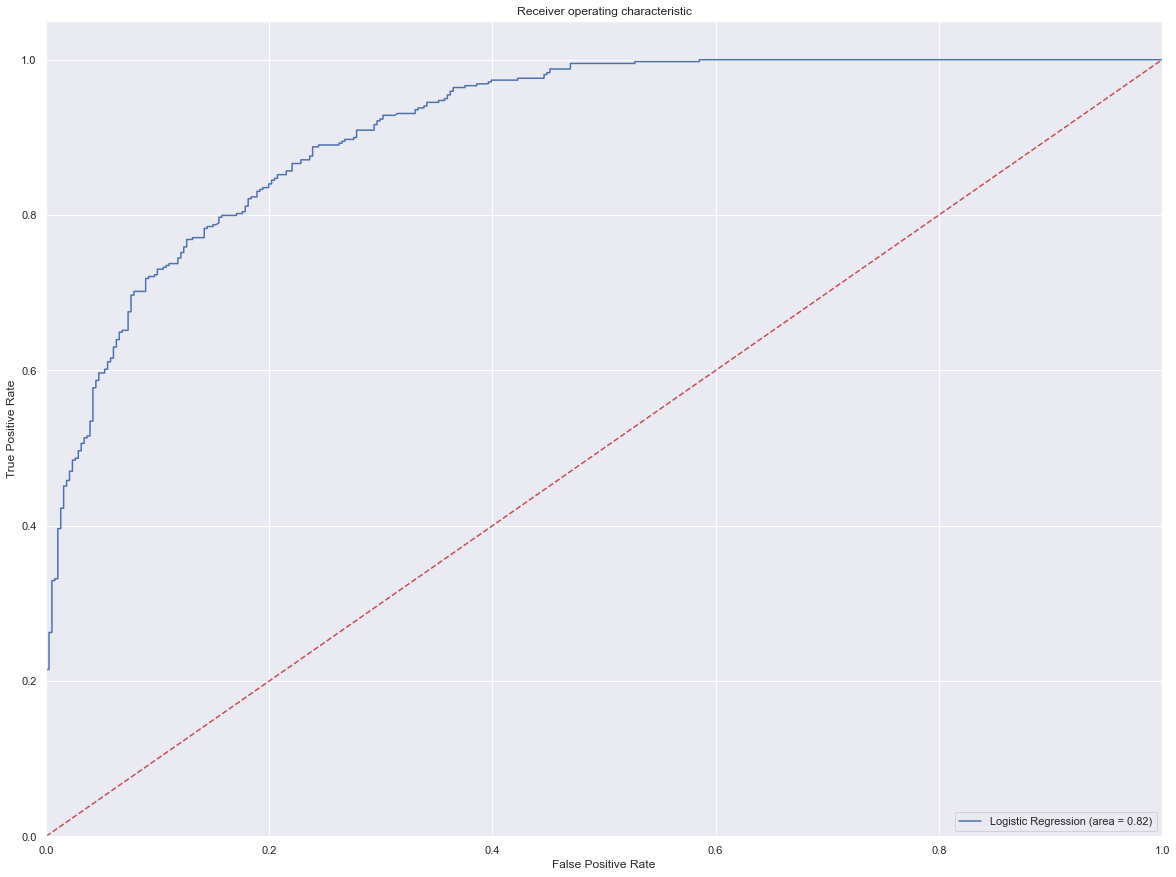

In [35]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(valid_y, logit_reg.predict(valid_x))
fpr, tpr, thresholds = roc_curve(valid_y, logit_reg.predict_proba(valid_x)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()